In [2]:
import math
import random

import ciw
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils import (
    Bernoulli,
    Exponential,
    Bandit,
    FTL,
    UniformExploration,
    OneBanditOneLearnerOneRun,
    UCB1,
    ThompsonSampling,
)

In [3]:
def get_selections_rewards(bandit, strategy, timeHorizon, iterations=1000):
    all_final_selections = []
    all_total_rewards = []
    all_strategies = []
    for _ in range(iterations):
        s, r = OneBanditOneLearnerOneRun(
            bandit, strategy, timeHorizon
        )
        all_strategies.append((s.count(0), s.count(1), s.count(2)))
        all_final_selections.append(s[-1])
        all_total_rewards.append(sum(r))
    return all_final_selections, all_total_rewards, all_strategies

In [104]:
def create_bandit(service_rates=[0.5, 1, 2.5]):
    bandit = Bandit(
        [Exponential(s) for s in service_rates]
    )
    return bandit

In [105]:
def create_simulation(arrival_rate, service_times, max_simulation_time):
    N = ciw.create_network(
        arrival_distributions=[ciw.dists.Exponential(arrival_rate)],
        service_distributions=[ciw.dists.Sequential(service_times)],
        number_of_servers=[1],
    )
    Q = ciw.Simulation(N)
    ciw.seed(0)
    Q.simulate_until_max_time(max_simulation_time)
    return Q

In [106]:
def run_multi_arm_bandit(
    arrival_rate, 
    service_rates,
    timeHorizon=10000,
    max_simulation_time=1000,
    algorithm=UCB1, 
):
    bandit = create_bandit(service_rates)
    strategy = algorithm(bandit.nbArms)
    selections, rewards = OneBanditOneLearnerOneRun(
        bandit, strategy, timeHorizon
    )
    service_times = [-s for s in rewards] + [20000000]
    
    Q = create_simulation(
        arrival_rate, service_times, max_simulation_time
    )
    Q.selections = selections
    Q.rewards = rewards
    return Q   


# Uniform Exploration

In [107]:
arrival_rate = 10
service_rates = [1, 5, 12]
timeHorizon = 10000
max_simulation_time = 1000
algorithm = UniformExploration

In [108]:
Q = run_multi_arm_bandit(
    arrival_rate=arrival_rate, 
    service_rates=service_rates,
    timeHorizon=timeHorizon,
    max_simulation_time=max_simulation_time,
    algorithm=algorithm
)
recs = Q.get_all_records()

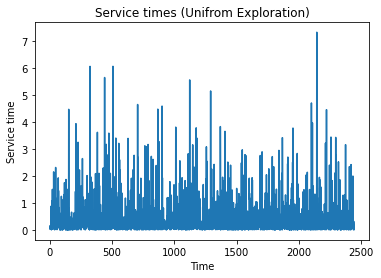

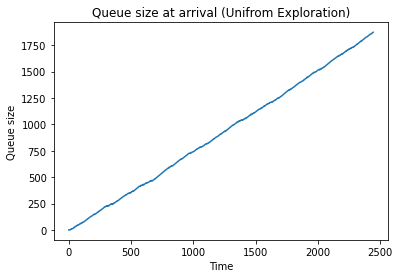

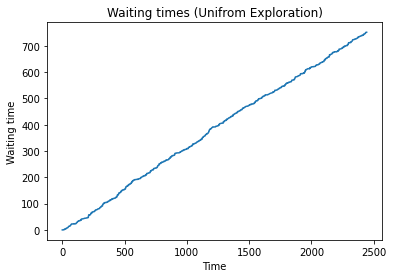

In [109]:
plt.plot([r.service_time for r in recs])
plt.title("Service times (Unifrom Exploration)")
plt.ylabel("Service time")
plt.xlabel("Time")
plt.show();

plt.plot([r.queue_size_at_arrival for r in recs])
plt.title("Queue size at arrival (Unifrom Exploration)")
plt.ylabel("Queue size")
plt.xlabel("Time")
plt.show();

plt.plot([r.waiting_time for r in recs])
plt.title("Waiting times (Unifrom Exploration)")
plt.ylabel("Waiting time")
plt.xlabel("Time")
plt.show();

# Follow The Leader

In [110]:
arrival_rate = 10
service_rates = [1, 5, 12]
timeHorizon = 10000
max_simulation_time = 1000
algorithm = FTL

In [111]:
Q = run_multi_arm_bandit(
    arrival_rate=arrival_rate, 
    service_rates=service_rates,
    timeHorizon=timeHorizon,
    max_simulation_time=max_simulation_time,
    algorithm=algorithm
)
recs = Q.get_all_records()

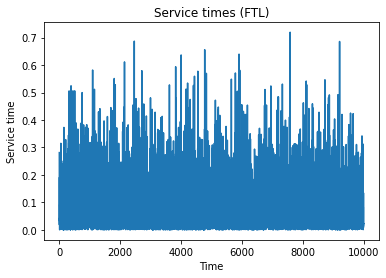

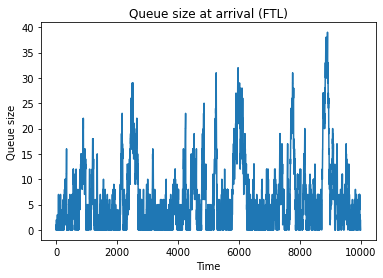

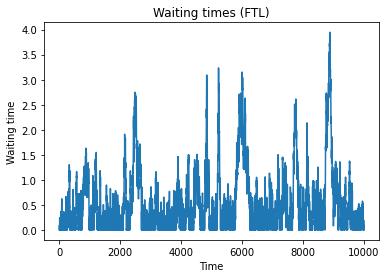

In [112]:
plt.plot([r.service_time for r in recs])
plt.title("Service times (FTL)")
plt.ylabel("Service time")
plt.xlabel("Time")
plt.show();

plt.plot([r.queue_size_at_arrival for r in recs])
plt.title("Queue size at arrival (FTL)")
plt.ylabel("Queue size")
plt.xlabel("Time")
plt.show();

plt.plot([r.waiting_time for r in recs])
plt.title("Waiting times (FTL)")
plt.ylabel("Waiting time")
plt.xlabel("Time")
plt.show();

# UCB1

In [113]:
arrival_rate = 10
service_rates = [1, 5, 12]
timeHorizon = 10000
max_simulation_time = 1000
algorithm = UCB1

In [114]:
Q = run_multi_arm_bandit(
    arrival_rate=arrival_rate, 
    service_rates=service_rates,
    timeHorizon=timeHorizon,
    max_simulation_time=max_simulation_time,
    algorithm=algorithm
)
recs = Q.get_all_records()

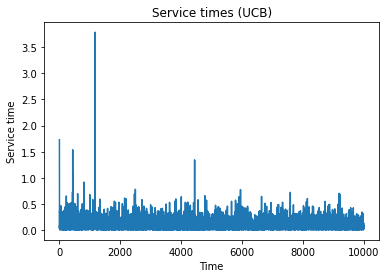

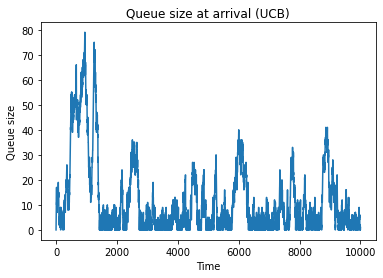

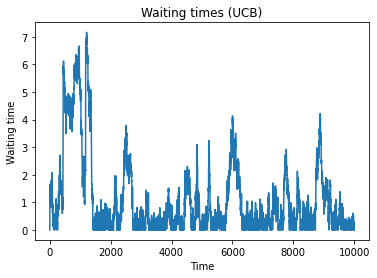

In [115]:
plt.plot([r.service_time for r in recs])
plt.title("Service times (UCB)")
plt.ylabel("Service time")
plt.xlabel("Time")
plt.show();

plt.plot([r.queue_size_at_arrival for r in recs])
plt.title("Queue size at arrival (UCB)")
plt.ylabel("Queue size")
plt.xlabel("Time")
plt.show();

plt.plot([r.waiting_time for r in recs])
plt.title("Waiting times (UCB)")
plt.ylabel("Waiting time")
plt.xlabel("Time")
plt.show();

# More servers

In [101]:
arrival_rate = 10
service_rates = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 11]
timeHorizon = 10000
max_simulation_time = 2000
algorithm = UCB1

In [102]:
Q = run_multi_arm_bandit(
    arrival_rate=arrival_rate, 
    service_rates=service_rates,
    timeHorizon=timeHorizon,
    max_simulation_time=max_simulation_time,
    algorithm=algorithm
)
recs = Q.get_all_records()

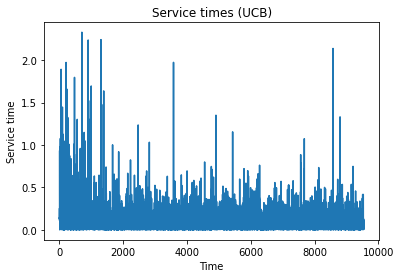

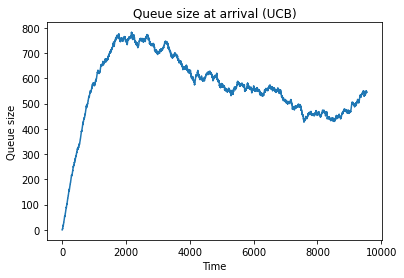

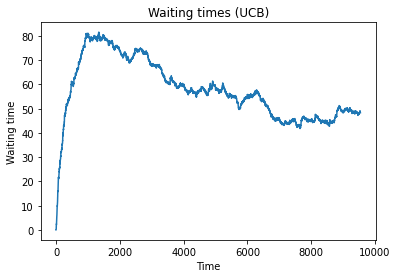

In [103]:
plt.plot([r.service_time for r in recs])
plt.title("Service times (UCB)")
plt.ylabel("Service time")
plt.xlabel("Time")
plt.show();

plt.plot([r.queue_size_at_arrival for r in recs])
plt.title("Queue size at arrival (UCB)")
plt.ylabel("Queue size")
plt.xlabel("Time")
plt.show();

plt.plot([r.waiting_time for r in recs])
plt.title("Waiting times (UCB)")
plt.ylabel("Waiting time")
plt.xlabel("Time")
plt.show();

(array([2.10e+01, 2.50e+01, 2.50e+01, 3.60e+01, 2.10e+01, 2.80e+01,
        2.90e+01, 6.00e+00, 3.50e+01, 1.20e+01, 3.40e+01, 1.80e+01,
        9.71e+03]),
 array([ 0.        ,  0.92307692,  1.84615385,  2.76923077,  3.69230769,
         4.61538462,  5.53846154,  6.46153846,  7.38461538,  8.30769231,
         9.23076923, 10.15384615, 11.07692308, 12.        ]),
 <BarContainer object of 13 artists>)

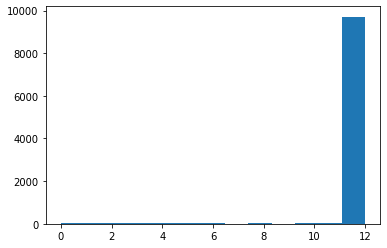

In [97]:
plt.hist(Q.selections, bins=13)

# Playground

In [14]:
bandit = create_bandit([1, 5, 12])

In [15]:
strategy_2 = UCB1(bandit.nbArms)
timeHorizon_2 = 10000
selections_2, rewards_2 = OneBanditOneLearnerOneRun(
    bandit, strategy_2, timeHorizon_2
)

In [16]:
service_times = [-s for s in rewards_2] + [20000000]

## Service times

In [17]:
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(10)],
    service_distributions=[ciw.dists.Sequential(service_times)],
    number_of_servers=[1],
)

In [18]:
Q = ciw.Simulation(N)
ciw.seed(0)
Q.simulate_until_max_time(1000)

In [19]:
recs = Q.get_all_records()
recs[-1]

Record(id_number=10000, customer_class=0, original_customer_class=0, node=1, arrival_date=994.3803504558231, waiting_time=0.0, service_start_date=994.3803504558231, service_time=0.011643218760923446, service_end_date=994.391993674584, time_blocked=0.0, exit_date=994.391993674584, destination=-1, queue_size_at_arrival=0, queue_size_at_departure=0, server_id=1, record_type='service')

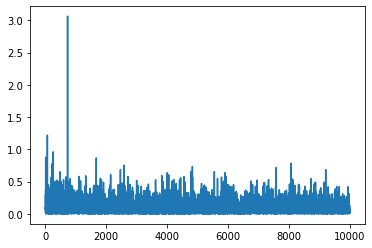

In [20]:
plt.plot([r.service_time for r in recs])

Text(0, 0.5, 'Number of people')

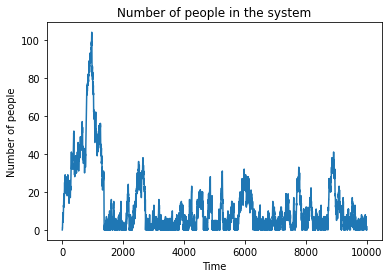

In [24]:
plt.plot([r.queue_size_at_arrival for r in recs])
plt.title("Number of people in the system")
plt.xlabel("Time")
plt.ylabel("Number of people")

Text(0, 0.5, 'Waiting time')

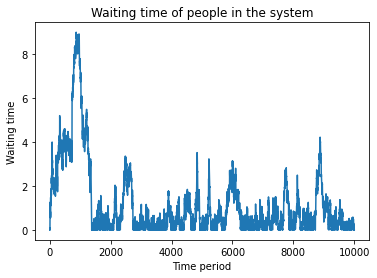

In [25]:
plt.plot([r.waiting_time for r in recs])
plt.title("Waiting time of people in the system")
plt.xlabel("Time period")
plt.ylabel("Waiting time")